In [114]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import random

In [115]:
sbn.set()

# Primeros intentos.

La verdad es que ahora vamos a ver primer cómo representar el gato, la primer aproximación es una matriz donde las _X_ serán representadas por $1$ y las _O_ por $-1$. Vamos a pensar que los lugares vacíos son representados por $0$. Así pues, lo que tenemos es lo siguiente:

In [2]:
def crear_tablero():
    """
    Este método construye un tablero
    en forma de matriz cuadrada de
    tamaño 3
    
    Returns
    -------
    numpy.ndarray
        A numpy array with shape (3,3) and
        filled with zeros.
    """
    return np.zeros((3,3))

In [3]:
print('Un tablero vacío:')
print(crear_tablero())

Un tablero vacío:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Ahora, vamos a crear una función para verificar si alguno de los participanes ya ganó.  
Primero vamos a empezar con alguno de los renglones.

In [4]:
def win_linea(tablero,transpuesta=False):
    """
    Este método recibe un talbero y determina si
    hay tres elementos iguales en algún renglón.
    Si se introduce la matriz transpuesta se indica
    y regresa la matriz transpuesta.
    
    Parameters
    ----------
    tablero : numpy.ndarray
        Es un numpy.ndarray de shape (3,3) el cual
        simula un tablero de gato
    transpuesta : bool
        Si se introduce el tablero transpuesto se indica.
    
    Returns
    -------
    estados : dict
        Settings dictionary with keys:
            ``1``
                Indicates if 1 won (`bool`).
            ``-1``
                Indicates if -1 won (`bool`).
            ``"tablero"``
                El mismo tablero que se introduce  (`numpy.ndarray`).
    """
    estados = {1:False,-1:False,'tablero':tablero.T if transpuesta else tablero}
    for i in range(3):
        if np.all(tablero[i,:] == tablero[i,0]) and tablero[i,0] != 0:
            estados[tablero[i,0]] = True
            return estados
    return estados

def win_diagonal(tablero):
    """
    Este método recibe un talbero y determina si
    hay tres elementos iguales en algún renglón.
    Si se introduce la matriz transpuesta se indica
    y regresa la matriz transpuesta.
    
    Parameters
    ----------
    tablero : numpy.ndarray
        Es un numpy.ndarray de shape (3,3) el cual
        simula un tablero de gato
    transpuesta : bool
        Si se introduce el tablero transpuesto se indica.
    
    Returns
    -------
    estados : dict
        Settings dictionary with keys:
            ``1``
                Indicates if 1 won (`bool`).
            ``-1``
                Indicates if -1 won (`bool`).
            ``"tablero"``
                El mismo tablero que se introduce  (`numpy.ndarray`).
    """
    estados = {1:False,-1:False,'tablero':tablero}
    
    if np.all(tablero.diagonal() == tablero.diagonal()[0]) and  tablero.diagonal()[0] != 0:
        estados[tablero.diagonal()[0]] = True
    elif np.all(np.rot90(tablero).diagonal() == np.rot90(tablero).diagonal()[0]) and np.rot90(tablero).diagonal()[0] != 0:
        estados[np.rot90(tablero).diagonal()[0]] = True
    return estados

In [5]:
def tirada_aleatoria(tablero):
    return np.random.choice(np.where(tablero.reshape(tablero.size)==0)[0])

In [6]:
def jugar(kind='cc') -> None:
    
    tirada = 1
    tablero = crear_tablero()
    
    if kind == 'hc':
        while True:
            print(tablero)
            if tirada == 1:
                coord = input('Dame las coodenadas para tirar')
                if tablero.reshape(tablero.size)[int(coord)] == 0:
                    tablero.reshape(tablero.size)[int(coord)] = tirada
                else:
                    print('Lugar ocuapdo, tira de nuevo')
                    continue
            else:
                tablero.reshape(tablero.size)[tirada_aleatoria(tablero)] = tirada
            if win_linea(tablero)[1] or win_linea(tablero.T,transpuesta=True)[1] or win_diagonal(tablero)[1]:
                print(tablero)
                break
            elif win_linea(tablero)[-1] or win_linea(tablero.T,transpuesta=True)[-1] or win_diagonal(tablero)[-1]:
                print(tablero)
                break
            else:
                tirada = -1*tirada
                if 0 in tablero.reshape(tablero.size):
                    pass
                else:
                    print('Empate')
                    print(tablero)
                    break
    elif kind == 'ch':
        while True:
            print(tablero)
            
            if tirada == 1:
                tablero.reshape(tablero.size)[tirada_aleatoria(tablero)] = tirada
            else:
                coord = input('Dame las coodenadas para tirar')
                if tablero.reshape(tablero.size)[int(coord)] == 0:
                    tablero.reshape(tablero.size)[int(coord)] = tirada
                else:
                    print('Lugar ocuapdo, tira de nuevo')
                    continue
                    
            if win_linea(tablero)[1] or win_linea(tablero.T,transpuesta=True)[1] or win_diagonal(tablero)[1]:
                print(tablero)
                break
            elif win_linea(tablero)[-1] or win_linea(tablero.T,transpuesta=True)[-1] or win_diagonal(tablero)[-1]:
                print(tablero)
                break
            else:
                tirada = -1*tirada
                if 0 in tablero.reshape(tablero.size):
                    pass
                else:
                    print('Empate')
                    print(tablero)
                    break
    elif kind == 'cc':
        while True:
            print(tablero)
            print('-----------')
            tablero.reshape(tablero.size)[tirada_aleatoria(tablero)] = tirada
            if win_linea(tablero)[1] or win_linea(tablero.T,transpuesta=True)[1] or win_diagonal(tablero)[1]:
                print(tablero)
                print('-----------')
                print('Ganó 1')
                break
            elif win_linea(tablero)[-1] or win_linea(tablero.T,transpuesta=True)[-1] or win_diagonal(tablero)[-1]:
                print(tablero)
                print('-----------')
                print('Ganó -1')
                break
            else:
                tirada = -1*tirada
                if 0 in tablero.reshape(tablero.size):
                    pass
                else:
                    print('Empate')
                    print(tablero)
                    break
    elif kind == 'hh':
        while True:
            print(tablero)
            print('-----------')
            coord = input('Dame las coodenadas para tirar')
            if tablero.reshape(tablero.size)[int(coord)] == 0:
                tablero.reshape(tablero.size)[int(coord)] = tirada
            else:
                print('Lugar ocuapdo, tira de nuevo')
                continue
            if win_linea(tablero)[1] or win_linea(tablero.T,transpuesta=True)[1] or win_diagonal(tablero)[1]:
                print(tablero)
                print('-----------')
                print('Ganó 1')
                break
            elif win_linea(tablero)[-1] or win_linea(tablero.T,transpuesta=True)[-1] or win_diagonal(tablero)[-1]:
                print(tablero)
                print('-----------')
                print('Ganó -1')
                break
            else:
                tirada = -1*tirada
                if 0 in tablero.reshape(tablero.size):
                    pass
                else:
                    print('Empate')
                    print(tablero)
                    break
    else:
        print('Pues nel chavo')

In [7]:
jugar()

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
-----------
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
-----------
[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
-----------
[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  1.  1.]]
-----------
[[-1.  0.  0.]
 [-1.  0.  0.]
 [ 0.  1.  1.]]
-----------
[[-1.  0.  0.]
 [-1.  0.  1.]
 [ 0.  1.  1.]]
-----------
[[-1.  0.  0.]
 [-1. -1.  1.]
 [ 0.  1.  1.]]
-----------
[[-1.  0.  1.]
 [-1. -1.  1.]
 [ 0.  1.  1.]]
-----------
Ganó 1


> _Hacer experimentos de longitud de juego y distribución de ganancias ¿Podemos predecir si va a ganar o perder la máquina?_

Ahora, ya construimos un gato. Vamos a hacerlo un clase ¿Por qué? Bueno, lo primero es que si nunca has usado clases te recomiendo mi blog, la segunda es porque más tarde sobre un mismo objeto vamos a poder añadir métodos que nos van a ser súper útiles. 

In [102]:
class gato:
    
    def __init__(self):
        self.tablero = self.crear_tablero()
        
    def tirada_aleatoria(self,tablero):
        return np.random.choice(np.where(tablero.reshape(tablero.size)==0)[0])

    def win_linea(self,tablero,transpuesta=False):
        """
        Este método recibe un talbero y determina si
        hay tres elementos iguales en algún renglón.
        Si se introduce la matriz transpuesta se indica
        y regresa la matriz transpuesta.

        Parameters
        ----------
        tablero : numpy.ndarray
            Es un numpy.ndarray de shape (3,3) el cual
            simula un tablero de gato
        transpuesta : bool
            Si se introduce el tablero transpuesto se indica.

        Returns
        -------
        estados : dict
            Settings dictionary with keys:
                ``1``
                    Indicates if 1 won (`bool`).
                ``-1``
                    Indicates if -1 won (`bool`).
                ``"tablero"``
                    El mismo tablero que se introduce  (`numpy.ndarray`).
        """
        estados = {1:False,-1:False,'tablero':tablero.T if transpuesta else tablero}
        for i in range(3):
            if np.all(tablero[i,:] == tablero[i,0]) and tablero[i,0] != 0:
                estados[tablero[i,0]] = True
                return estados
        return estados

    def win_diagonal(self,tablero):
        """
        Este método recibe un talbero y determina si
        hay tres elementos iguales en algún renglón.
        Si se introduce la matriz transpuesta se indica
        y regresa la matriz transpuesta.

        Parameters
        ----------
        tablero : numpy.ndarray
            Es un numpy.ndarray de shape (3,3) el cual
            simula un tablero de gato
        transpuesta : bool
            Si se introduce el tablero transpuesto se indica.

        Returns
        -------
        estados : dict
            Settings dictionary with keys:
                ``1``
                    Indicates if 1 won (`bool`).
                ``-1``
                    Indicates if -1 won (`bool`).
                ``"tablero"``
                    El mismo tablero que se introduce  (`numpy.ndarray`).
        """
        estados = {1:False,-1:False,'tablero':tablero}

        if np.all(tablero.diagonal() == tablero.diagonal()[0]) and  tablero.diagonal()[0] != 0:
            estados[tablero.diagonal()[0]] = True
        elif np.all(np.rot90(tablero).diagonal() == np.rot90(tablero).diagonal()[0]) and np.rot90(tablero).diagonal()[0] != 0:
            estados[np.rot90(tablero).diagonal()[0]] = True
        return estados

    
    def jugar(self,kind='cc') -> None:

        tirada = 1
        tablero = self.crear_tablero()
        length = 0
        toWin = {1:False, -1:False, 'length':0}

        if kind == 'hc':
            while True:
                print(tablero)
                print('-----------')
                if tirada == 1:
                    coord = input('Dame las coodenadas para tirar')
                    if tablero.reshape(tablero.size)[int(coord)] == 0:
                        tablero.reshape(tablero.size)[int(coord)] = tirada
                    else:
                        print('Lugar ocuapdo, tira de nuevo')
                        continue
                else:
                    tablero.reshape(tablero.size)[self.tirada_aleatoria(tablero)] = tirada
                if self.win_linea(tablero)[1] or self.win_linea(tablero.T,transpuesta=True)[1] or self.win_diagonal(tablero)[1]:
                    print(tablero)
                    print('-----------')
                    print('Ganó -1')
                    break
                elif self.win_linea(tablero)[-1] or self.win_linea(tablero.T,transpuesta=True)[-1] or self.win_diagonal(tablero)[-1]:
                    print(tablero)
                    print('-----------')
                    print('Ganó -1')
                    break
                else:
                    tirada = -1*tirada
                    if 0 in tablero.reshape(tablero.size):
                        pass
                    else:
                        print(tablero)
                        print('-----------')
                        print('Empate')
                        break
        elif kind == 'ch':
            while True:
                print(tablero)
                print('-----------')
                if tirada == 1:
                    tablero.reshape(tablero.size)[self.tirada_aleatoria(tablero)] = tirada
                else:
                    coord = input('Dame las coodenadas para tirar')
                    if tablero.reshape(tablero.size)[int(coord)] == 0:
                        tablero.reshape(tablero.size)[int(coord)] = tirada
                    else:
                        print('Lugar ocuapdo, tira de nuevo')
                        continue

                if self.win_linea(tablero)[1] or self.win_linea(tablero.T,transpuesta=True)[1] or self.win_diagonal(tablero)[1]:
                    print(tablero)
                    print('-----------')
                    print('Ganó -1')
                    break
                elif self.win_linea(tablero)[-1] or self.win_linea(tablero.T,transpuesta=True)[-1] or self.win_diagonal(tablero)[-1]:
                    print(tablero)
                    print('-----------')
                    print('Ganó -1')
                    break
                else:
                    tirada = -1*tirada
                    if 0 in tablero.reshape(tablero.size):
                        pass
                    else:
                        print(tablero)
                        print('-----------')
                        print('Empate')
                        break
        elif kind == 'cc':
            while True:
                length += 1
                tablero.reshape(tablero.size)[tirada_aleatoria(tablero)] = tirada
                if self.win_linea(tablero)[1] or self.win_linea(tablero.T,transpuesta=True)[1] or self.win_diagonal(tablero)[1]:
                    length += 1
                    toWin[1],toWin['length'] = True,length
                    break
                elif self.win_linea(tablero)[-1] or self.win_linea(tablero.T,transpuesta=True)[-1] or self.win_diagonal(tablero)[-1]:
                    length += 1
                    toWin[-1],toWin['length'] = True,length
                    break
                else:
                    tirada = -1*tirada
                    if 0 in tablero.reshape(tablero.size):
                        pass
                    else:
                        length += 1
                        toWin['length'] = length
                        break
            return toWin
        elif kind == 'hh':
            while True:
                print(tablero)
                print('-----------')
                coord = input('Dame las coodenadas para tirar')
                if tablero.reshape(tablero.size)[int(coord)] == 0:
                    tablero.reshape(tablero.size)[int(coord)] = tirada
                else:
                    print('Lugar ocuapdo, tira de nuevo')
                    continue
                    
                if self.win_linea(tablero)[1] or self.win_linea(tablero.T,transpuesta=True)[1] or self.win_diagonal(tablero)[1]:
                    print(tablero)
                    print('-----------')
                    print('Ganó 1')
                    break
                elif self.win_linea(tablero)[-1] or self.win_linea(tablero.T,transpuesta=True)[-1] or self.win_diagonal(tablero)[-1]:
                    print(tablero)
                    print('-----------')
                    print('Ganó -1')
                    break
                else:
                    tirada = -1*tirada
                    if 0 in tablero.reshape(tablero.size):
                        pass
                    else:
                        print(tablero)
                        print('-----------')
                        print('Empate')
                        break
        else:
            print('Pues nel chavo')

    def crear_tablero(self):
        """
        Este método construye un tablero
        en forma de matriz cuadrada de
        tamaño 3

        Returns
        -------
        numpy.ndarray
            A numpy array with shape (3,3) and
            filled with zeros.
        """
        return np.zeros((3,3))

In [47]:
G = gato()

In [68]:
G.jugar()

{1: True, -1: False, 'length': 9}

Ya tenemos un gato ¿Pero realmente entendemos el juego de gato?

Voy a abordar un poco de [teoría de complejidad computacional](https://en.wikipedia.org/wiki/Computational_complexity_theory) pero antes vamos a sentar un precedente histórico ¿Qué tanto tarda el sistema en ganar, qué tan frecuente es un empate, cuál es la distribución de partidas ganadas entres 1 y -1?

In [110]:
G = gato()
whoWin = []
size = []

In [111]:
for i in range(20000):
    a = G.jugar()
    if a[1]:
        whoWin.append(1)
        size.append(a['length'])
    elif a[-1]:
        whoWin.append(-1)
        size.append(a['length'])
    else:
        whoWin.append(0)
        size.append(a['length'])

In [112]:
Counter(whoWin)

Counter({1: 11753, 0: 2522, -1: 5725})

In [113]:
Counter(size)

Counter({8: 5266, 10: 7116, 7: 1798, 9: 3927, 6: 1893})

In [123]:
Counter(whoWin).items()

dict_items([(1, 11753), (0, 2522), (-1, 5725)])

In [128]:
list(Counter(whoWin).values())

[11753, 2522, 5725]

In [122]:
(Counter(whoWin).keys(),Counter(whoWin).values())

(dict_keys([1, 0, -1]), dict_values([11753, 2522, 5725]))

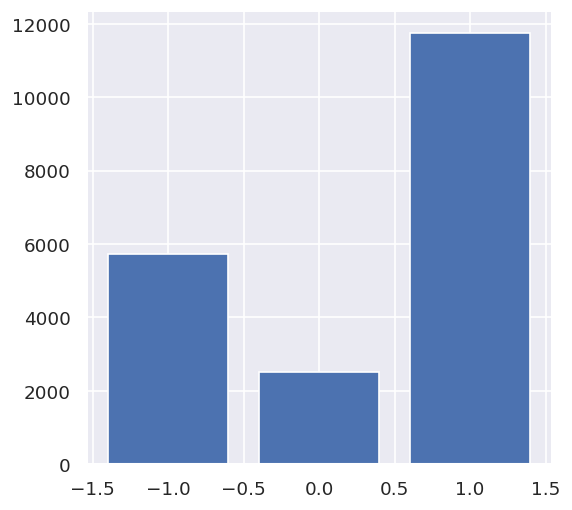

In [130]:
fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=120)
ax.bar(x=list(Counter(whoWin).keys()),height=list(Counter(whoWin).values()))
plt.show()

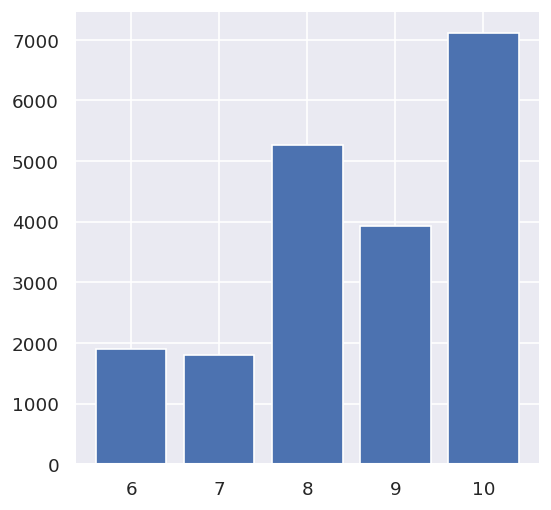

In [131]:
fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=120)
ax.bar(x=list(Counter(size).keys()),height=list(Counter(size).values()))
plt.show()